In [1]:
###load libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import binom_test
import matplotlib.pyplot as plt

In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('Downloads/PupilBioTest_PMP_revA.csv')

In [3]:
#visulize the data
print(df)

         strand    CpG_Coordinates  `000  `001  `010  `011  `100  `101  `110  \
0             r  10035:10044:10046  1077     9     0     0     0     0     0   
1             r  10035:10044:10053  1086     0     0     0     0     0     0   
2             r  10035:10044:10058  1069    17     0     0     0     0     0   
3             r  10035:10044:10071  1072    14     0     0     0     0     0   
4             r  10035:10044:10075  1086     0     0     0     0     0     0   
...         ...                ...   ...   ...   ...   ...   ...   ...   ...   
15392178      f   9998:10121:10133    76     0     0     0     0     0     0   
15392179      f   9998:10121:10140    47     0     0     0     0     0     0   
15392180      f   9998:10130:10133    76     0     0     0     0     0     0   
15392181      f   9998:10130:10140    47     0     0     0     0     0     0   
15392182      f   9998:10133:10140    47     0     0     0     0     0     0   

          `111  Sample_ID Replicate Tis

In [4]:
# extract two types tissues 
group1 = df[df['Tissue'] == 'cfDNA']
group2 = df[df['Tissue'] == 'Islet']  

In [5]:
######As large dataset shows memory error jupyternotebook local macine going to count and normalize methon
#using count
#Group by Sample_ID and sum the methylation states
count_df1 = group1.groupby('Sample_ID').agg({
    '`000': 'sum',
    '`001': 'sum',
    '`010': 'sum',
    '`011': 'sum',
    '`100': 'sum',
    '`101': 'sum',
    '`110': 'sum',
    '`111': 'sum'
}).reset_index()
#  Group by Sample_ID and sum the methylation states
count_df2 = group2.groupby('Sample_ID').agg({
    '`000': 'sum',
    '`001': 'sum',
    '`010': 'sum',
    '`011': 'sum',
    '`100': 'sum',
    '`101': 'sum',
    '`110': 'sum',
    '`111': 'sum'
}).reset_index()


In [6]:
# Step 2: Normalize the counts by dividing each column by the total count for the corresponding Sample_ID
#for cfDNA tissue
count_df1['Total'] = count_df1[['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']].sum(axis=1)

# Normalize the counts
normalized_df1 = count_df1.copy()
for col in ['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']:
    normalized_df1[col] = count_df1[col] / count_df1['Total']

# Drop the 'Total' column
normalized_df1 = normalized_df1.drop(columns=['Total'])

# Show the final normalized count file
print(normalized_df1)

#for Islet tissue 
count_df2['Total'] = count_df2[['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']].sum(axis=1)

# Normalize the counts
normalized_df2 = count_df2.copy()
for col in ['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']:
    normalized_df2[col] = count_df2[col] / count_df2['Total']

# Drop the 'Total' column
normalized_df2 = normalized_df2.drop(columns=['Total'])

# Show the final normalized count file
print(normalized_df2)

    Sample_ID      `000      `001      `010      `011      `100      `101  \
0           1  0.861819  0.019441  0.017591  0.011685  0.022022  0.007841   
1           2  0.886762  0.017878  0.015600  0.010955  0.017166  0.006402   
2           3  0.898393  0.016106  0.014519  0.007990  0.016795  0.004614   
3           4  0.882573  0.017105  0.015198  0.009495  0.018144  0.005859   
4           5  0.877563  0.018600  0.015827  0.010106  0.018862  0.005612   
5           6  0.890535  0.017065  0.015680  0.009345  0.018045  0.005274   
6           7  0.904298  0.014766  0.013251  0.008208  0.015389  0.004683   
7           8  0.893669  0.017742  0.015553  0.008625  0.018095  0.004864   
8           9  0.897392  0.015939  0.014762  0.008008  0.018589  0.004521   
9          10  0.889355  0.016926  0.014248  0.008762  0.016689  0.005110   
10         11  0.870533  0.018499  0.014623  0.010881  0.017444  0.005945   
11         12  0.908657  0.015702  0.013230  0.007619  0.014391  0.004203   

In [7]:
# Create a DataFrame with 1 and 0 for tissue1 and tissue2
df_t1 = pd.DataFrame({'tissue': [1] * 48}) ###48:rows of cfDNA
df_t2 = pd.DataFrame({'tissue': [0] * 32}) ###48:rows of cfDNA

In [8]:
#add tissue column with value asigned value
dft1norm_combined = pd.concat([normalized_df1, df_t1], axis=1)
dft2norm_combined = pd.concat([normalized_df2, df_t2], axis=1)

In [9]:
#combine both tisssue 
dfallt_combined = pd.concat([dft1norm_combined, dft2norm_combined], axis=0, ignore_index=True)

In [10]:
print(dfallt_combined)

    Sample_ID      `000      `001      `010      `011      `100      `101  \
0           1  0.861819  0.019441  0.017591  0.011685  0.022022  0.007841   
1           2  0.886762  0.017878  0.015600  0.010955  0.017166  0.006402   
2           3  0.898393  0.016106  0.014519  0.007990  0.016795  0.004614   
3           4  0.882573  0.017105  0.015198  0.009495  0.018144  0.005859   
4           5  0.877563  0.018600  0.015827  0.010106  0.018862  0.005612   
..        ...       ...       ...       ...       ...       ...       ...   
75         76  0.759284  0.032728  0.027919  0.026358  0.029222  0.020282   
76         77  0.792788  0.034810  0.028286  0.022604  0.028442  0.016735   
77         78  0.854199  0.025997  0.022081  0.013761  0.023499  0.010476   
78         79  0.794301  0.029729  0.023615  0.022664  0.024462  0.018724   
79         80  0.750321  0.035007  0.027674  0.025496  0.027661  0.021334   

        `110      `111  tissue  
0   0.011131  0.048469       1  
1   0.009

In [11]:
#### machine learning method 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler

In [12]:
# Features and target
X = dfallt_combined.drop(['Sample_ID', 'tissue'], axis=1)
y = dfallt_combined['tissue']

In [13]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [15]:
# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate performance on test set
y_pred_proba = rf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc_score}")


ROC AUC Score: 0.9921875


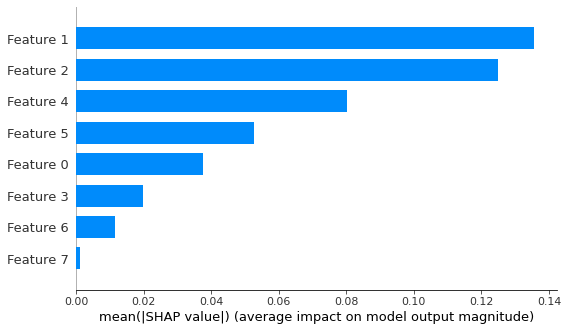

Top PMP Features by Importance:
  CpG_Pattern  Mean_SHAP_Value
1        `001         0.135675
2        `010         0.124951
4        `100         0.080128
5        `101         0.052609
0        `000         0.037689
3        `011         0.019870
6        `110         0.011443
7        `111         0.001309


In [72]:
# Use SHAP to interpret feature importance
import shap
import numpy as np
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Summarize SHAP values for PMP importance
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Assign confidence to each PMP
importance_df = pd.DataFrame({
    "CpG_Pattern": X.columns,
    "Mean_SHAP_Value": np.abs(shap_values[1]).mean(axis=0)
})

# Rank PMPs by importance
importance_df = importance_df.sort_values(by="Mean_SHAP_Value", ascending=False)
print("Top PMP Features by Importance:")
print(importance_df)


VRF for cfDNA:
`000    0.886926
`001    0.017195
`010    0.015181
`011    0.009283
`100    0.017594
`101    0.005470
`110    0.008663
`111    0.039688
dtype: float64
VRF for Islet:
`000    0.800087
`001    0.029983
`010    0.024432
`011    0.020937
`100    0.025062
`101    0.016117
`110    0.017968
`111    0.065415
dtype: float64


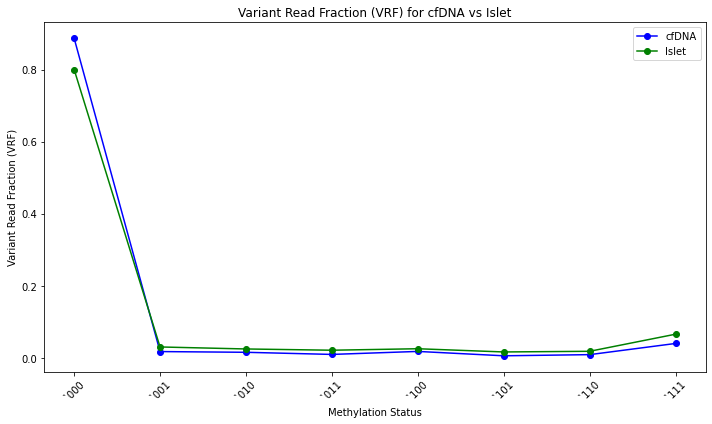

In [58]:
import matplotlib.pyplot as plt

# Calculate the mean VRF for cfDNA and Islet
VRF_cfDNA = normalized_df1.iloc[:, 1:].mean()
VRF_Islet = normalized_df2.iloc[:, 1:].mean()

# Print the calculated VRF values
print("VRF for cfDNA:")
print(VRF_cfDNA)

print("VRF for Islet:")
print(VRF_Islet)

# Plotting the VRF for both cfDNA and Islet
plt.figure(figsize=(10, 6))

# Plot VRF for cfDNA
plt.plot(VRF_cfDNA.index, VRF_cfDNA.values, label='cfDNA', marker='o', color='blue')

# Plot VRF for Islet
plt.plot(VRF_Islet.index, VRF_Islet.values, label='Islet', marker='o', color='green')

# Add labels and title
plt.xlabel('Methylation Status')
plt.ylabel('Variant Read Fraction (VRF)')
plt.title('Variant Read Fraction (VRF) for cfDNA vs Islet')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

In [32]:
print(df.columns.tolist())

['strand', 'CpG_Coordinates', '`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111', 'Sample_ID', 'Replicate', 'Tissue']


In [77]:
# List possible methylation statuses (e.g., '000', '001', etc.)
methylation_statuses = ['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']

'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.


Threshold of Reads for Top 10 PMPs:
                 PMP  Threshold_Reads_Tissue2  Simulated_Reads
0  10260:10262:10266                       10               86
1  10290:10294:10298                       10               94
2  10286:10290:10294                        9               92
3  10256:10260:10262                        9               85
4  10286:10294:10298                        9               90
5  10286:10290:10298                        9               90
6  10256:10262:10266                        9               83
7  10256:10260:10266                        9               83
8  10219:10222:10224                        9               93
9  10222:10224:10227                        9               93


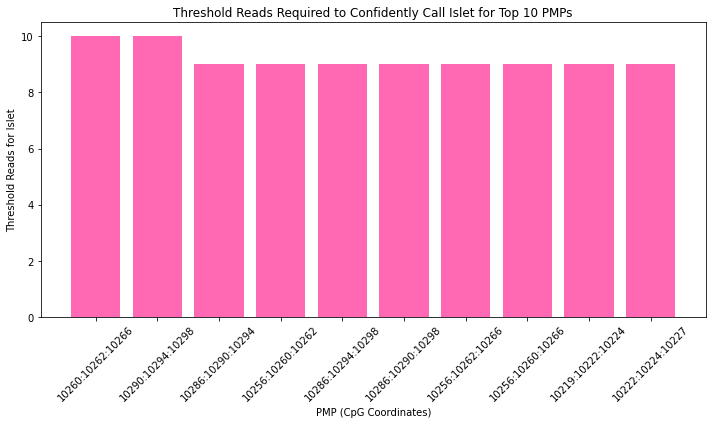

In [60]:
# Calculate Total Reads per PMP
# For each row, sum the methylation status columns to compute total reads
df['Total_Reads'] = df[methylation_statuses].sum(axis=1)

#Group Data by Tissue and CpG Coordinates
# Group by Tissue and CpG_Coordinates, then sum the total reads for each group
grouped_df = df.groupby(['Tissue', 'CpG_Coordinates']).agg({'Total_Reads': 'sum'}).reset_index()

#  Identify the Top 10 PMPs Based on Total Reads in Tissue #2
# Filter for Tissue #2 and get the top 10 PMPs by total reads
top_10_pmps = grouped_df[grouped_df['Tissue'] == 'Islet'].nlargest(10, 'Total_Reads')

# Set the Total Sequencing Depth (1 Million Reads)
# Define total sequencing depth
total_depth = 1_000_000

# Initialize an empty list to store results
thresholds = []

#  Loop Through Top 10 PMPs to Estimate Thresholds
# For each of the top 10 PMPs, calculate the threshold of reads required to confidently call Tissue #2
for _, row in top_10_pmps.iterrows():
    pmp = row['CpG_Coordinates']
    reads_tissue2 = row['Total_Reads']
    
    # Get the number of reads for the same PMP in Tissue #1
    reads_tissue1 = grouped_df[(grouped_df['Tissue'] == 'cfDNA') & 
                                 (grouped_df['CpG_Coordinates'] == pmp)]['Total_Reads'].values[0]
    
    # Estimate the total fraction of reads for this PMP across both tissues
    total_reads_pmp = reads_tissue2 + reads_tissue1
    fraction_reads_pmp = total_reads_pmp / grouped_df['Total_Reads'].sum()
    
    # Simulate reads for this PMP at 1 million sequencing depth
    simulated_reads = int(total_depth * fraction_reads_pmp)
    
    #  Perform Binomial Test to Find the Threshold for Tissue #2
    # Perform a binomial test for various threshold values
    for threshold in range(1, simulated_reads + 1):
        # Perform binomial test to check statistical significance
        p_value = binom_test(threshold, simulated_reads, reads_tissue2 / total_reads_pmp, alternative='greater')
        
        if p_value < 0.05:  # If p-value is less than 0.05, the threshold is considered valid
            thresholds.append({'PMP': pmp, 'Threshold_Reads_Tissue2': threshold, 'Simulated_Reads': simulated_reads})
            break  # Exit the loop once the threshold is found for this PMP

# Store and Display the Results
# Convert the results to a DataFrame for easier viewing
thresholds_df = pd.DataFrame(thresholds)

# Display the results
print("Threshold of Reads for Top 10 PMPs:")
print(thresholds_df)

# Optional Visualization - Plot the Thresholds
# Plot the threshold for each of the top 10 PMPs
plt.figure(figsize=(10, 6))
plt.bar(thresholds_df['PMP'], thresholds_df['Threshold_Reads_Tissue2'], color='hotpink')
plt.xlabel('PMP (CpG Coordinates)')
plt.ylabel('Threshold Reads for Islet')
plt.title('Threshold Reads Required to Confidently Call Islet for Top 10 PMPs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
###### Biomarkar identification pyhton and using machine learning (N.B: for running requied server for this large sample dataset:) 

######Biomarkar identification 

import numpy as np
from scipy.stats import fisher_exact
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total counts for each PMP
coverage_cols = ['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']
df['Total_Coverage'] = df[coverage_cols].sum(axis=1)

# Filter data for each tissue
tissue1 = df[df['Tissue'] == 'cfDNA']
tissue2 = df[df['Tissue'] == 'Islet']

# Initialize results
results = []

for index, row in df.iterrows():
    # Construct a contingency table for Fisher's exact test
    pmp_counts_t1 = tissue1.loc[
        tissue1['CpG_Coordinates'] == row['CpG_Coordinates'], 'Total_Coverage'
    ].sum()
    pmp_counts_t2 = tissue2.loc[
        tissue2['CpG_Coordinates'] == row['CpG_Coordinates'], 'Total_Coverage'
    ].sum()

    contingency_table = [
        [pmp_counts_t1, len(tissue1) - pmp_counts_t1],
        [pmp_counts_t2, len(tissue2) - pmp_counts_t2]
    ]

    # Perform Fisher's exact test
    _, p_value = fisher_exact(contingency_table, alternative='greater')

    # Calculate specificity and sensitivity
    tn, fp, fn, tp = confusion_matrix(
        [1] * int(pmp_counts_t1) + [0] * int(pmp_counts_t2),
        [1] * int(pmp_counts_t1) + [0] * int(pmp_counts_t2)
    ).ravel()

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Store results
    results.append({
        'CpG_Coordinates': row['CpG_Coordinates'],
        'Strand': row['strand'],
        'Specificity': specificity,
        'Sensitivity': sensitivity,
        'P-Value': p_value
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Filter PMPs by high specificity
high_specificity_pmps = results_df[(results_df['Specificity'] >= 0.95) & (results_df['P-Value'] < 0.05)]

# Print the biomarkers
print("High Specificity Biomarkers:")
print(high_specificity_pmps)
# Plot Specificity vs Sensitivity
plt.figure(figsize=(10, 6))
sns.scatterplot(df=results_df, x='Sensitivity', y='Specificity', hue='P-Value', size='P-Value', palette='viridis')
plt.title("Specificity vs Sensitivity of PMPs")
plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.legend(title="P-Value")
plt.show()

In [ ]:

#### machine learning method 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
# Features and target
X = dfallt_combined.drop(['Sample_ID', 'tissue'], axis=1)
y = dfallt_combined['tissue']
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate performance on test set
y_pred_proba = rf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc_score}")


# Use SHAP to interpret feature importance
import shap
import numpy as np
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Summarize SHAP values for PMP importance
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Assign confidence to each PMP
importance_df = pd.DataFrame({
    "CpG_Pattern": X.columns,
    "Mean_SHAP_Value": np.abs(shap_values[1]).mean(axis=0)
})

# Rank PMPs by importance
importance_df = importance_df.sort_values(by="Mean_SHAP_Value", ascending=False)
print("Top PMP Features by Importance:")
print(importance_df)